# Lending Loan Project

## Overview
This notebook represents a project dedicated to the LendingClub Loan Data. LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. LendingClub enables borrowers to create unsecured personal loans between \\$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

Within this project, I seek to achieve two goals. First, to determine some key performance indicators (KPIs) that can provide useful insigths to decision-makers. Second, to build a machine learning algorithm for the purpose of correctly identifying whether a person, given certain characteristics, has a high likelihood to default on a loan. 

In order to develop this data science project, I followed some phases including - data exploration, data cleaning, and feature engineering.

### Dataset Details

The LendingClub files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.), latest payment information, and credit bureau data (e.g., FICO, revolving balances, etc.) For the purpose of this project, the anlysis includes only the 2015 year data.
The complete Lending Club data, and data dictionary, can be downloaded by following this link: https://www.kaggle.com/wendykan/lending-club-loan-data

In [1]:
# Import the necessary modules
import numpy as np
import pandas as pd
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#convert data into dataframe
df=pd.read_csv('/Users/sg/Desktop/github/LendingLoan/LendingClub_Loan_2015.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Columns: 145 entries, id to settlement_term
dtypes: float64(68), int64(40), object(37)
memory usage: 465.8+ MB


In [4]:
#display all rows and columns
pd.set_option('display.max_columns', 145)
pd.set_option('display.max_rows', 421095)

There are 421,095 observations and 145 variables.

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000,12000,12000.0,60 months,9.80%,253.79,B,B3,Teacher,10+ years,MORTGAGE,65000.0,Not Verified,15-Dec,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,660xx,KS,23.84,0,3-Nov,0,NaN,NaN,18,0,9786,13.40%,37,w,0.00,0.00,13842.62641,13842.63,12000.00,1842.63,0.0,0.0,0.0,17-Nov,8529.37,NaN,17-Nov,0,NaN,1,Individual,NaN,NaN,NaN,0,0,181540,2.0,6.0,2.0,3.0,1.0,65001.0,61.0,1.0,5.0,7909.0,42.0,73200,0.0,0.0,0.0,8,10086,41055.0,17.1,0,0,127.0,145,4,1,2,4.0,NaN,14.0,NaN,0,2,4,5,10,13,11,22.0,4,18,0.0,0,0,3,100.0,0.0,0,0,291626,74787,49500,105910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,36 months,5.32%,752.87,A,A1,Director,1 year,MORTGAGE,150000.0,Not Verified,15-Dec,Current,n,NaN,NaN,credit_card,Credit card refinancing,054xx,VT,9.54,0,Feb-96,0,NaN,NaN,7,0,19339,42.50%,18,w,6628.03,6628.03,20257.29000,20257.29,18371.97,1885.32,0.0,0.0,0.0,18-Mar,752.87,18-Apr,17-Aug,0,NaN,1,Individual,NaN,NaN,NaN,0,0,430856,1.0,2.0,0.0,0.0,28.0,25447.0,6.0,1.0,1.0,19339.0,34.0,45500,0.0,7.0,0.0,1,61551,24661.0,44.0,0,0,166.0,238,4,4,7,73.0,NaN,NaN,NaN,0,1,1,3,3,4,4,7.0,1,7,0.0,0,0,1,100.0,0.0,0,0,512381,44786,44000,51081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,28000,28000,28000.0,60 months,18.49%,718.51,D,D5,Engineer,10+ years,MORTGAGE,75000.0,Verified,15-Dec,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,471xx,IN,31.88,0,2-Oct,0,NaN,NaN,27,0,43413,51.90%,46,w,18904.38,18904.38,18609.35000,18609.35,9095.62,9513.73,0.0,0.0,0.0,18-Mar,718.51,18-Apr,

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,0.0,421093.000000,421095.000000,421095.000000,217133.000000,74415.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,122729.000000,421095.0,511.000000,509.000000,421095.000000,421095.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,421095.00000,421095.000000,417132.000000,416868.000000,421095.000000,421095.000000,408841.000000,421095.000000,421095.000000,421095.000000,421095.000000,417297.000000,108600.000000,376496.000000,151737.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421094.000000,421095.000000,421095.000000,401865.000000,421095.000000,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2114.0,2114.000000,2114.0,2114.000000,1736.000000,2114.000000,2114.000000,7398.000000,7398.000000,7398.000000
mean,NaN,NaN,15240.285862,15240.285862,15234.156426,441.849432,7.696561e+04,NaN,19.148367,0.347397,0.572690,34.023391,66.592609,11.948643,0.233776,1.768548e+04,25.493468,2327.938947,2326.858564,14143.351472,14137.897098,11175.695048,2807.992836,1.378155e+00,158.285431,28.159325,3924.709030,0.020240,43.809866,1.0,109981.011585,18.310118,0.006087,257.478241,1.400755e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.580491,1.389060,2.975482,5887.979740,60.881995,3.365771e+04,0.943945,1.537058,2.234091,4.66500,13104.784721,9636.063992,62.228136,0.010420,13.765184,127.567419,186.586697,13.451247,8.013204,1.685261,24.856534,39.838177,6.751163,35.797142,0.527054,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,14.883601,5.809238,11.894537,0.000761,0.004042,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

There are some features with missing data.

# KPIs

## 1. What is the monthly total loan volume in dollars?

In [7]:
df['loan_amnt'].describe()

count    421095.000000
mean      15240.285862
std        8571.325901
min        1000.000000
25%        8500.000000
50%       14000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [8]:
df['loan_amnt'].head()

0    12000
1    25000
2    28000
3    30000
4    17600
Name: loan_amnt, dtype: int64

In [9]:
df['issue_d'].describe()

count     421095
unique        12
top       15-Oct
freq       48631
Name: issue_d, dtype: object

In [10]:
df['issue_d'].value_counts()

15-Oct    48631
15-Jul    45962
15-Dec    44343
15-Nov    37530
15-Aug    35886
15-Apr    35427
15-Jan    35107
15-May    31913
15-Sep    28641
15-Jun    28485
15-Mar    25400
15-Feb    23770
Name: issue_d, dtype: int64

In [11]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%y-%b')
df['issue_d'].head(5)

0   2015-12-01
1   2015-12-01
2   2015-12-01
3   2015-12-01
4   2015-12-01
Name: issue_d, dtype: datetime64[ns]

In [12]:
df['issue_d_month']=df['issue_d'].dt.strftime('%b')
df[['issue_d','issue_d_month']].head()

,issue_d,issue_d_month
0,2015-12-01,Dec
1,2015-12-01,Dec
2,2015-12-01,Dec
3,2015-12-01,Dec
4,2015-12-01,Dec


In [13]:
#drop issue_d variable
df.drop('issue_d', axis=1, inplace=True)

In [14]:
# Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['issue_d_month'] = pd.Categorical(df['issue_d_month'], categories=months, ordered=True)

In [15]:
tot_volume=df.groupby('issue_d_month')['loan_amnt'].agg(sum).reset_index()

In [16]:
tot_volume['($) millions'] = '$' + (tot_volume['loan_amnt'].astype(float)/1000000).round(1).astype(str) + 'B'
tot_volume.head(12)

,issue_d_month,loan_amnt,($) millions
0,Jan,533132575,$533.1B
1,Feb,366908525,$366.9B
2,Mar,390003275,$390.0B
3,Apr,539401075,$539.4B
4,May,483189475,$483.2B
5,Jun,429777175,$429.8B
6,Jul,696238600,$696.2B
7,Aug,555331400,$555.3B
8,Sep,450246800,$450.2B
9,Oct,738221400,$738.2B


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

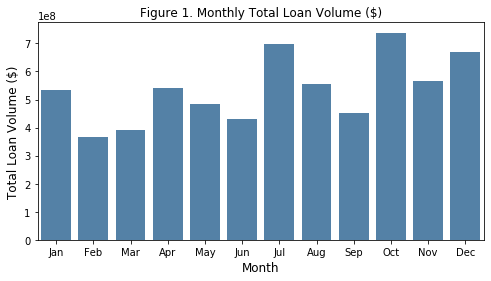

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(x='issue_d_month', y='loan_amnt', data=tot_volume, color="steelblue")
plt.title('Figure 1. Monthly Total Loan Volume ($)')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Loan Volume ($)', fontsize=12)
plt.xticks(rotation='horizontal')

The month with the highest volume of loans issued was October with 738.9B in US dollars and the month with the lowest was February with 366.9B in US dollars.

## 2. What is the monthly average loan size?

In [18]:
avg_loan=df.groupby('issue_d_month')['loan_amnt'].agg('mean').astype(int).reset_index()
avg_loan

,issue_d_month,loan_amnt
0,Jan,15185
1,Feb,15435
2,Mar,15354
3,Apr,15225
4,May,15140
5,Jun,15087
6,Jul,15148
7,Aug,15474
8,Sep,15720
9,Oct,15180


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

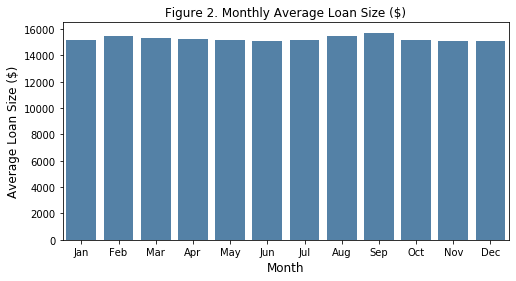

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(x='issue_d_month', y='loan_amnt', data=avg_loan, color="steelblue")
plt.title('Figure 2. Monthly Average Loan Size ($)')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Loan Size ($)', fontsize=12)
plt.xticks(rotation='horizontal')

The monthly average loan size is around $15,000 and is the same across months. 

## 3. What are the default rates by loan grade?

In [20]:
loan_status_srs = df.loan_status.value_counts()
loan_status_srs

Fully Paid            196814
Current               151713
Charged Off            63845
Late (31-120 days)      4905
In Grace Period         2757
Late (16-30 days)       1052
Default                    9
Name: loan_status, dtype: int64

Based on the information obtained from the loan_status variable, I consider that the default those loans late more than 120 days as default. Therefore these include the Default and the Charged Off loans. To estimate the default rate, I would consider the summation of Default and Charged Off loans.

In [21]:
grouped1=df.groupby('grade')['loan_status'].value_counts().unstack().stack(dropna=False).reset_index(name="count")

In [22]:
categ = grouped1[(grouped1['loan_status'] == 'Charged Off') | (grouped1['loan_status'] == 'Default')]
grouped2=categ.groupby('grade').sum().reset_index()

In [23]:
grouped2['default_rate']=grouped2['count']*100/len(df)
grouped2['default_rate']=grouped2['default_rate'].round(1)
grouped2

,grade,count,default_rate
0,A,3304.0,0.8
1,B,11470.0,2.7
2,C,19558.0,4.6
3,D,14734.0,3.5
4,E,10164.0,2.4
5,F,3691.0,0.9
6,G,933.0,0.2


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

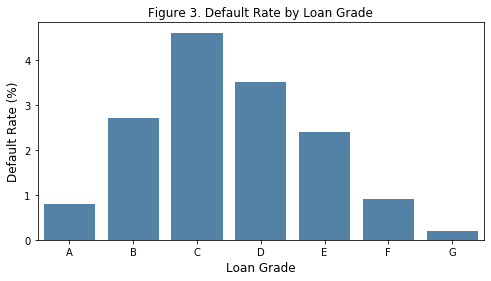

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(x='grade', y='default_rate', data=grouped2, color="steelblue")
plt.title('Figure 3. Default Rate by Loan Grade')
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.xticks(rotation='horizontal')

According to Figure 3, the loan grade with the highest default rate is C (4.6%) and the loan grade with the lowest default rate is G (0.2%).

## Data Exploration

Before building the model, I explored the data for missing values and data inconsistencies.

### Missing data

In [25]:
pct_null = df.isnull().sum().sort_values(ascending=False)*100/len(df)
pct_null

id                                            100.000000
sec_app_mths_since_last_major_derog           100.000000
revol_bal_joint                               100.000000
sec_app_earliest_cr_line                      100.000000
sec_app_inq_last_6mths                        100.000000
sec_app_mort_acc                              100.000000
sec_app_open_acc                              100.000000
sec_app_revol_util                            100.000000
sec_app_open_act_il                           100.000000
sec_app_num_rev_accts                         100.000000
sec_app_chargeoff_within_12_mths              100.000000
sec_app_collections_12_mths_ex_med            100.000000
member_id                                     100.000000
url                                           100.000000
desc                                           99.989314
dti_joint                                      99.879125
annual_inc_joint                               99.878650
verification_status_joint      

According to the results, there is missing data. The sample size is 421095 and based on the above results, we can see that some features have complete missing data while other variables have few observations missing.

Also, there are some attributes mising more than others. The most prevalent variables with missing data include those that have information about the secondary applicant, hardship plan, settlement plan, open installment accounts in past 12 and 24 months. These variable are missing more than 90% of the data. 

### Erroneous data values

In [26]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,0.0,421093.000000,421095.000000,421095.000000,217133.000000,74415.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,122729.000000,421095.0,511.000000,509.000000,421095.000000,421095.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,421095.00000,421095.000000,417132.000000,416868.000000,421095.000000,421095.000000,408841.000000,421095.000000,421095.000000,421095.000000,421095.000000,417297.000000,108600.000000,376496.000000,151737.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421094.000000,421095.000000,421095.000000,401865.000000,421095.000000,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2114.0,2114.000000,2114.0,2114.000000,1736.000000,2114.000000,2114.000000,7398.000000,7398.000000,7398.000000
mean,NaN,NaN,15240.285862,15240.285862,15234.156426,441.849432,7.696561e+04,NaN,19.148367,0.347397,0.572690,34.023391,66.592609,11.948643,0.233776,1.768548e+04,25.493468,2327.938947,2326.858564,14143.351472,14137.897098,11175.695048,2807.992836,1.378155e+00,158.285431,28.159325,3924.709030,0.020240,43.809866,1.0,109981.011585,18.310118,0.006087,257.478241,1.400755e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.580491,1.389060,2.975482,5887.979740,60.881995,3.365771e+04,0.943945,1.537058,2.234091,4.66500,13104.784721,9636.063992,62.228136,0.010420,13.765184,127.567419,186.586697,13.451247,8.013204,1.685261,24.856534,39.838177,6.751163,35.797142,0.527054,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,14.883601,5.809238,11.894537,0.000761,0.004042,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

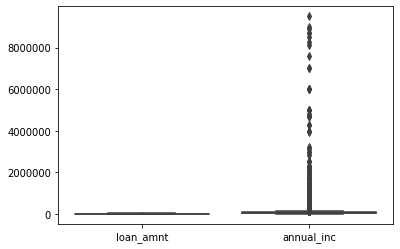

In [27]:
sns.boxplot(data=df.loc[:,['loan_amnt', 'annual_inc']])

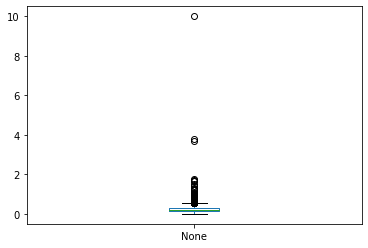

In [28]:
loantoincome=df['loan_amnt']/df['annual_inc']
loantoincome.plot.box()

In [29]:
loantoincome.describe()

count    4.210950e+05
mean              inf
std               NaN
min      3.090095e-04
25%      1.363636e-01
50%      2.125000e-01
75%      3.027066e-01
max               inf
dtype: float64

I discovered values of "999" in numeric variables (for example, in "dti"), suggesting this "999" value may be coding a qualitative feature of the variable and not a numeric value per se (for example, a "don't know" or "refuse" or missing value). I also inspected variables of interest, like the loan amount and annual income. A simple way to detect something may be wrong with these key variables is by calculating the "debt-to-income" ratio. Two main issues arouse from the data: (1) Apparently, loans have been issued to individuals with "0" income, which, even though it is possible, it is not expected to see many of them (those cases should be revised); and (2) There are very high ratios (at 4 and even 10, for example). Even though being an outlier does not mean the values are necessarily erroneous, that loans are given to individuals at rates 10 times their annual income suggests a possible error, and that those cases should be looked more closely.

## Data preparation

To predict default I will build a random forest model. 
Before I model the data, I will prepare the data for modeling. The steps include to convert the categorical variables into numeric variables, remove unnecessary columns, create the dependent variable, handling missing data.  

### Remove columns missing 90% of data
I'll remove variables that have a percentage of missing data higher than 90%.

In [30]:
pct_null = df.isnull().sum()/len(df)

In [31]:
missing_features = pct_null[pct_null > 0.90].index

In [32]:
df.drop(missing_features, axis=1, inplace=True)

In [33]:
df.shape

(421095, 93)

After removing the columns with a percentage of missing values higher than 90%, the new dataset contains 93 variables.

#### Convert strings(object) type into category type

In [34]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

#### Convert categories to codes/numbers

In [35]:
for name, column in df.items():
  if column.dtype.name == 'category':
    df[name] = column.cat.codes
    
# count dtypes in the dataframe
df.dtypes.value_counts()    

int64      40
float64    28
int8       21
int16       3
int32       1
dtype: int64

### Handling missing data

#### Impute missing data
Those numeric variables with a percentage of missing less than 90%, I will keep them in the dataset and impute their median value.

In [36]:
# iterate through column name and column values and if column values are numerical, replace NA values with the column median.
for name, column in df.items():
  if column.dtype == np.number:
    df[name] = df[name].fillna(column.median())



#### Remove columns where number of unique value is only 1.

In [37]:
unique = df.nunique()
unique = unique[unique.values == 1]

In [38]:
df.drop(labels = list(unique.index), axis =1, inplace=True)
df.shape

(421095, 91)

In [39]:
df.dtypes.value_counts()

int64      39
float64    28
int8       20
int16       3
int32       1
dtype: int64

#### Create default variable
The default variable is categorical, which indicates 1 for default and 0 for not default.
The default on loan happens when the loan was considred on Default or Charged Off, which are levels from loan_status variable.

In [40]:
default_srs1 = df.loan_status.value_counts()
default_srs1

3    196814
1    151713
0     63845
6      4905
4      2757
5      1052
2         9
Name: loan_status, dtype: int64

In [41]:
df['default'] = np.where((df.loan_status == 0) |
                        (df.loan_status == 2), 1, 0)

# Random Forest Model

In [42]:
# Extract the target variable
# Create an y series with the target variable (default)
y = df.default.copy()

In [43]:
### Create an X dataframe with the input features
# Drop dependent variable and loan_status
X = df.drop(['default', 'loan_status'], axis=1)

Split the dataset into training and test.
The training set is used to build the machine learning models.
The test set is used to see how well the model performs on unseen data.
I will use the AUC (Area Under Curve) as the evaluation metric of our model. 


In [44]:
#80% go into the training set, 20% into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
rf=RandomForestClassifier(n_estimators=1, max_depth=3, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('AUC(Area Under Curve):', auc(false_positive_rate, true_positive_rate))

AUC(Area Under Curve): 0.6507255422062724


Building a single tree, we get a AUC of 0.813. Now I move to make it better by adding more trees (n_estimators=20).

In [46]:
rf=RandomForestClassifier(n_estimators=20, min_samples_leaf=3, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('AUC(Area Under Curve):', auc(false_positive_rate, true_positive_rate))

AUC(Area Under Curve): 0.9946559525667031


Looking at the results of applying the prediction model to the test set, we see that the AUC of the model was 0.995. It is much better than the previous one. Now I will analyze what variables are important in this random forest. 

In [47]:
def rf_feat_importance(rf, X):
    return pd.DataFrame({'cols':X.columns, 'importance':rf.feature_importances_}
                       ).sort_values('importance', ascending=False)

fi = rf_feat_importance(rf, X_train); fi[:15]

,cols,importance
38,collection_recovery_fee,0.251847
37,recoveries,0.131055
34,total_rec_prncp,0.101811
40,last_pymnt_amnt,0.064859
32,total_pymnt,0.058607
1,funded_amnt,0.048362
39,last_pymnt_d,0.046955
33,total_pymnt_inv,0.045573
5,installment,0.038077
31,out_prncp_inv,0.030169


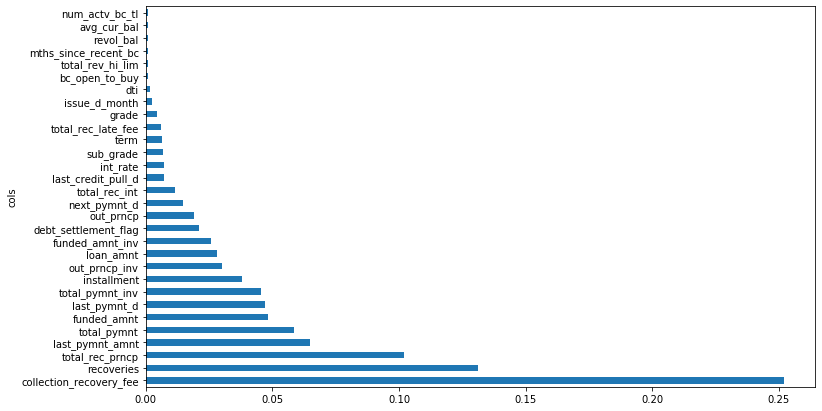

In [48]:
def plot_fi(fi): 
  return fi.plot('cols','importance','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [49]:
#keep the variables with an importance higher than 0.005
X_keep = fi[fi.importance>0.005].cols; len(X_keep)

21

The number of variables that now I use to build the random forest is 21.

In [50]:
X_keep = X[X_keep].copy()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_keep, y, test_size=0.2)

In [52]:
rf=RandomForestClassifier(n_estimators=20, min_samples_leaf=3, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('AUC(Area Under Curve):', auc(false_positive_rate, true_positive_rate))

AUC(Area Under Curve): 0.9986660389202762


Here the AUC of our model is a little higher (0.999) than the one in our previous model (0.995), and it is still high.

From the feature importance results we can see that the most important variables are principal received to date (total_rec_prncp), post charge off gross recovery (recoveries), and post charge off collection fee (collection_recovery_fee). I now analyze them with respect to the dependent variable.

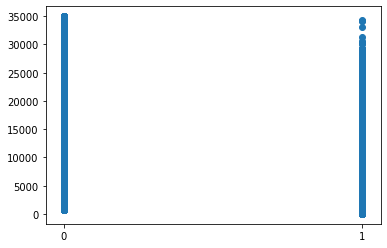

In [53]:
plt.scatter(df["default"].astype(str), df["total_rec_prncp"])

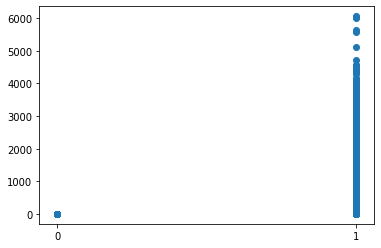

In [54]:
plt.scatter(df["default"].astype(str), df["collection_recovery_fee"])

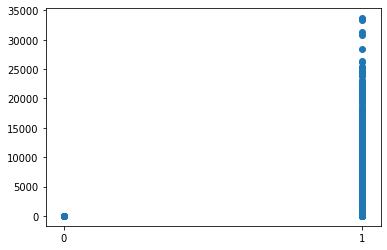

In [55]:
plt.scatter(df["default"].astype(str), df["recoveries"])

Looking at the plots, we can see that the two variables collection_recovery_fee and recoveries are deterministic with respect to defaulting on the loan. Therefore, I will remove them from the data and run again the random forest model.

In [56]:
X_new = X_keep.drop(['collection_recovery_fee', 'recoveries'], axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
rf=RandomForestClassifier(n_estimators=10, min_samples_leaf=3, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('AUC(Area Under Curve):', auc(false_positive_rate, true_positive_rate))

AUC(Area Under Curve): 0.9979140428211587


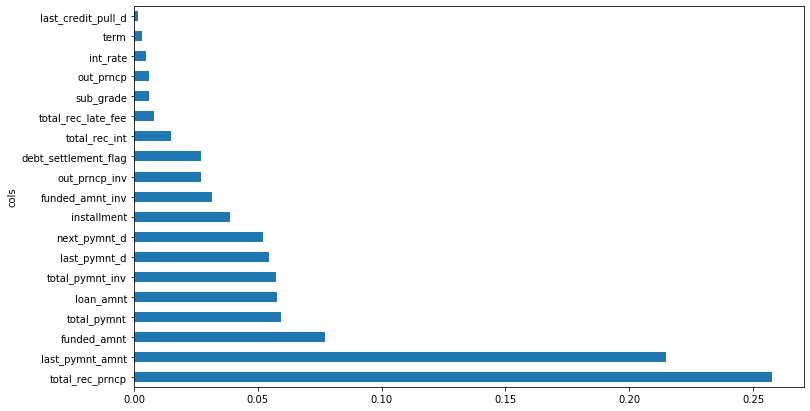

In [58]:
def rf_feat_importance(rf, X_new):
    return pd.DataFrame({'cols':X_new.columns, 'importance':rf.feature_importances_}
                       ).sort_values('importance', ascending=False)

fi = rf_feat_importance(rf, X_train); fi[:15]

def plot_fi(fi): 
  return fi.plot('cols','importance','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

After removing the two variables, AUC is 0.999. It seems that the two variables deleted did not contribute much to the prediction of the model.

In conclusion, after removing unimportant and redudant variables, the final model consisted of the 19 independent variables. The most important predictors are principal received to date and last last total payment amount received, followed by loan amount.